In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sales_data.csv", parse_dates=['Date'], dayfirst=True)
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Chocolate,5,10.0,50.0
1,2023-01-02,Biscuits,7,20.0,140.0
2,2023-01-03,Sweets,9,15.0,135.0
3,2023-01-04,Water,3,7.5,22.5
4,2023-01-05,Orange Juice,8,12.5,100.0
...,...,...,...,...,...
146,2022-04-06,NaN,5,10.0,50.0
147,2022-04-07,Biscuits,7,20.0,140.0
148,2022-04-08,Sweets,9,15.0,135.0
149,2022-04-09,Water,3,7.5,22.5


In [2]:
rpl_dict = {
    "Product": "Unknown",
    "Quantity": 0,
    "Price": 0.0,
    "Total": 0.0,
}
df = df.replace(np.nan, rpl_dict)
df["Total"] = df["Quantity"] * df["Price"]
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Chocolate,5,10.0,50.0
1,2023-01-02,Biscuits,7,20.0,140.0
2,2023-01-03,Sweets,9,15.0,135.0
3,2023-01-04,Water,3,7.5,22.5
4,2023-01-05,Orange Juice,8,12.5,100.0
...,...,...,...,...,...
146,2022-04-06,Unknown,5,10.0,50.0
147,2022-04-07,Biscuits,7,20.0,140.0
148,2022-04-08,Sweets,9,15.0,135.0
149,2022-04-09,Water,3,7.5,22.5


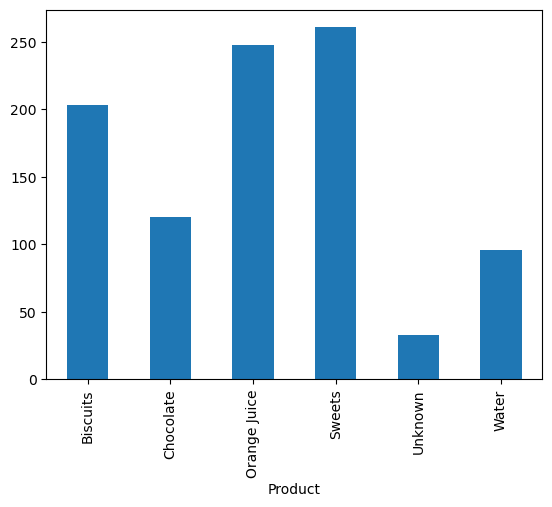

In [3]:
import matplotlib.pyplot as plt
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales.plot(kind='bar')
plt.show()

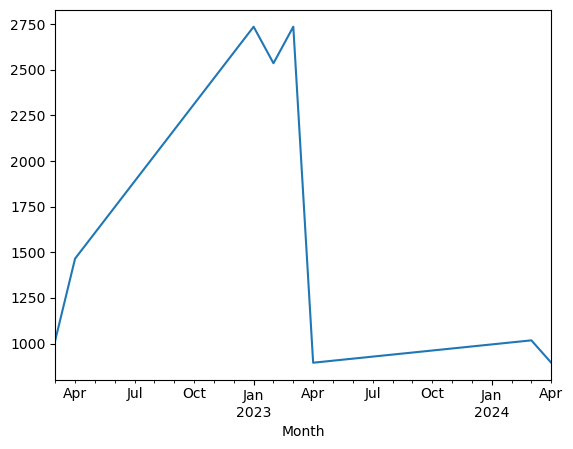

In [4]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()
monthly_sales.plot(kind='line')
plt.show()

In [29]:
df.to_csv("cleaned_sales_data.csv")

In [50]:
import torch
print(torch.__version__)
torch.manual_seed(1337)

2.3.0


In [51]:
import torch.nn as nn
import torch.optim as optim

In [52]:
X = torch.randn(120, 8)
w = torch.randn(8,1)
b = torch.tensor(1)
noise = 0.5 * torch.randn(120,1)
X.shape

torch.Size([120, 8])

In [53]:
y = X @ w + b + noise

In [54]:
y.shape

torch.Size([120, 1])

In [59]:
class RevenueNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super(RevenueNet, self).__init__()
        self.fc1 = nn.Linear(8,16)
        self.fc2 = nn.Linear(16,8)
        self.output = nn.Linear(8,1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.output(x)

In [60]:
model = RevenueNet()
model

RevenueNet(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [61]:
loss_function = nn.MSELoss()
optimiser = optim.Adam(model.parameters(), lr=0.010)

In [ ]:
running_loss = 0.0
for epoch in range(30):
    optimiser.zero_grad()
    outputs = model(X)
    loss = loss_function(outputs, y)
    loss.backward()
    optimiser.step()

    # running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

Epoch 1, Loss: 13.279754638671875
Epoch 2, Loss: 13.064250946044922
Epoch 3, Loss: 12.866132736206055
Epoch 4, Loss: 12.680414199829102
Epoch 5, Loss: 12.495415687561035
Epoch 6, Loss: 12.302064895629883
Epoch 7, Loss: 12.089672088623047
Epoch 8, Loss: 11.85162353515625
Epoch 9, Loss: 11.585268020629883
Epoch 10, Loss: 11.283839225769043
Epoch 11, Loss: 10.93898868560791
Epoch 12, Loss: 10.552292823791504
Epoch 13, Loss: 10.118773460388184
Epoch 14, Loss: 9.64091968536377
Epoch 15, Loss: 9.116408348083496
Epoch 16, Loss: 8.545058250427246
Epoch 17, Loss: 7.930937767028809
Epoch 18, Loss: 7.27827262878418
Epoch 19, Loss: 6.59138298034668
Epoch 20, Loss: 5.879810810089111
Epoch 21, Loss: 5.153405666351318
Epoch 22, Loss: 4.426554203033447
Epoch 23, Loss: 3.7201359272003174
Epoch 24, Loss: 3.0542993545532227
Epoch 25, Loss: 2.454895496368408
Epoch 26, Loss: 1.9487035274505615
Epoch 27, Loss: 1.5622692108154297
Epoch 28, Loss: 1.3158206939697266
Epoch 29, Loss: 1.2106335163116455
Epoch 30,